In [19]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [109]:
import pandas as pd
import matplotlib.pyplot as plt

def cleaned_data(df):
    df.columns = df.columns.str.strip()
    df = df.fillna(0)

    df = df[df['Applicants'] != 0]
    df['Admit Rate'] = df['Admits'] / df['Applicants']
    df = df.replace([float('inf'), -float('inf')], pd.NA)
    df = df.dropna(subset=['Admit Rate'])

    return df

In [111]:
def top_schools(df):
    print("\nTop 10 Schools based on Number of Admits:")

    top = df.sort_values(by='Admits', ascending=False).head(10)

    for i in range(len(top)):
        idx = top.index[i]
        school = top.loc[idx, 'School']
        admits = int(top.loc[idx, 'Admits'])
        print(f"{school}: {admits} admits")

    plt.figure(figsize=(10, 6))
    plt.barh(top['School'], top['Admits'])
    plt.xlabel("Number of Admits")
    plt.title("Top 10 Schools based on Number of Admits")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [113]:
def applicants_based_on_county(df):
    print("\nTop 10 Counties based on Total Applicants:")

    grouped = df.groupby('County/State/ Territory')
    total_applicants = grouped['Applicants'].sum()
    sorted_applicants = total_applicants.sort_values(ascending=False)
    counties = sorted_applicants.head(10)

    for i in range(len(counties)):
        county = counties.index[i]
        count = counties.iloc[i]
        print(f"{county}: {int(count)} applicants")

    plt.figure(figsize=(10, 6))
    counties.plot(kind='bar')
    plt.ylabel("Total Applicants")
    plt.title("Top 10 Counties based on Applicants")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [115]:
def admit_rate(df):
    plt.figure(figsize=(8, 5))
    plt.hist(df['Admit Rate'], bins=20, edgecolor='black')
    plt.title("Distribution of the Admit Rates")
    plt.xlabel("Admit Rate")
    plt.ylabel("Number of Schools")
    plt.tight_layout()
    plt.show()


First 5 rows of reshaped data:
Count                       School           City County/State/ Territory  \
0           A B MILLER HIGH SCHOOL        Fontana          San Bernardino   
1                     ABLE CHARTER       Stockton             San Joaquin   
2      ABRAHAM LINCOLN HIGH SCHOOL    Los Angeles             Los Angeles   
3      ABRAHAM LINCOLN HIGH SCHOOL  San Francisco           San Francisco   
4      ABRAHAM LINCOLN HIGH SCHOOL       San Jose             Santa Clara   

Count  Admits  Applicants  Enrolled  
0        67.0        81.0      27.0  
1        10.0        14.0       3.0  
2        55.0        74.0      18.0  
3       166.0       249.0      98.0  
4        73.0       104.0      37.0  

Top 10 Schools based on Number of Admits:
DOUGHERTY VALLEY HIGH SCHOOL: 542 admits
DUBLIN HIGH SCHOOL: 464 admits
LOWELL HIGH SCHOOL: 442 admits
BERKELEY HIGH SCHOOL: 410 admits
ARCADIA HIGH SCHOOL: 370 admits
MISSION SAN JOSE HIGH SCHOOL: 362 admits
DIAMOND BAR HIGH SCHOOL: 

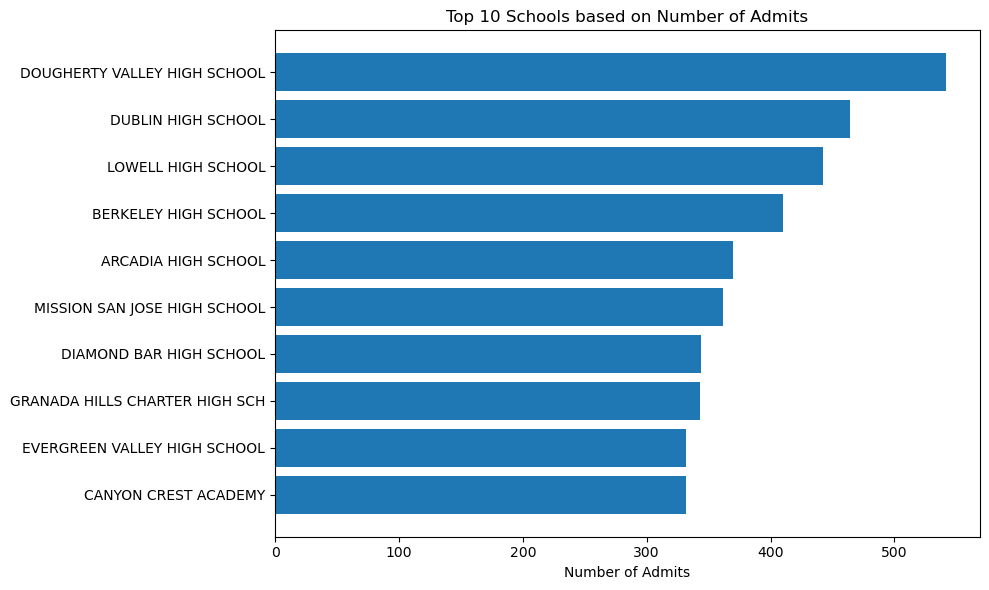


Top 10 Counties based on Total Applicants:
Los Angeles: 31992 applicants
Orange: 11560 applicants
San Diego: 10684 applicants
Santa Clara: 7902 applicants
Riverside: 7010 applicants
Alameda: 6886 applicants
San Bernardino: 5830 applicants
Contra Costa: 4491 applicants
Sacramento: 3775 applicants
San Mateo: 2807 applicants


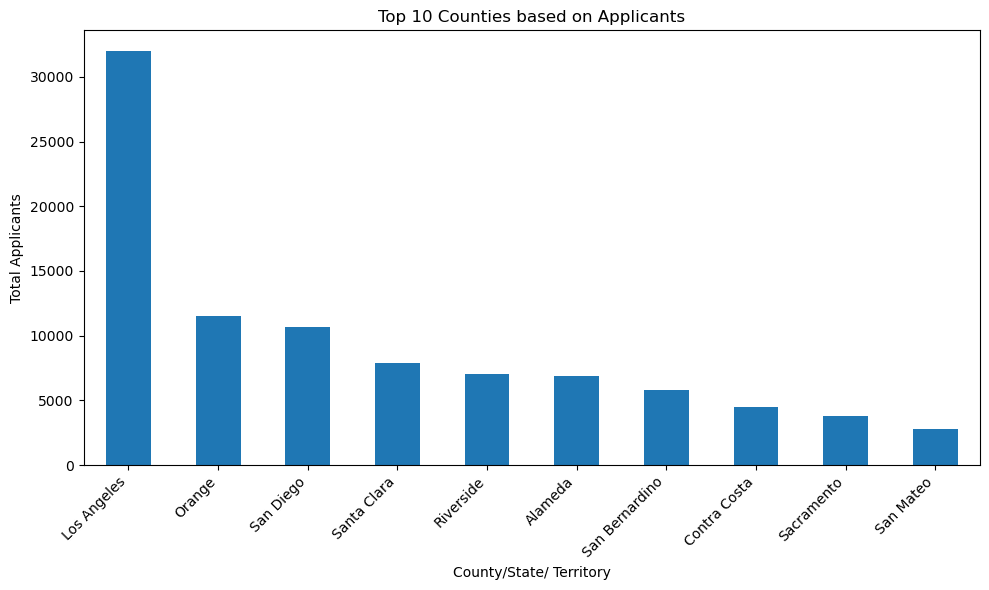

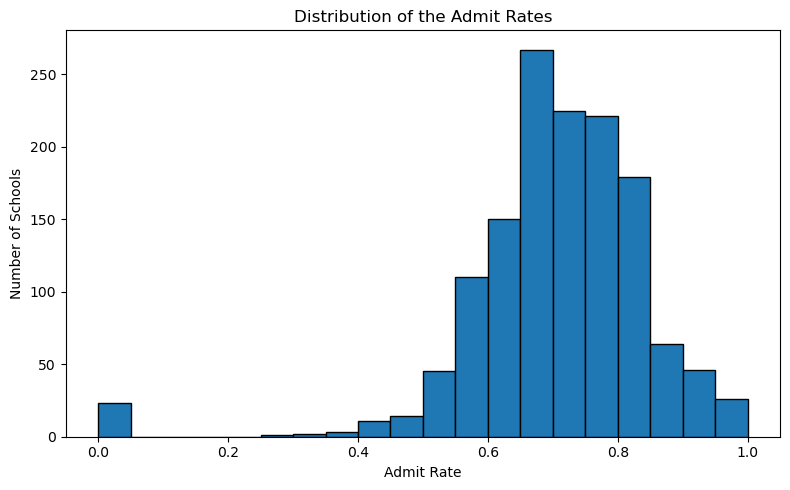

In [117]:
def main():
    df = pd.read_csv("FR ENR.csv", encoding='utf-16', sep='\t')

    df = df.pivot_table(
        index=['School', 'City', 'County/State/ Territory'],
        columns='Count',
        values='All',
        aggfunc='first'
    ).reset_index()

    df = df.rename(columns={
        'App': 'Applicants',
        'Adm': 'Admits',
        'Enr': 'Enrolled'
    })

    print("\nFirst 5 rows of the reshaped data are as follows :")
    print(df.head())

    df = cleaned_data(df)

    top_schools(df)
    applicants_based_on_county(df)
    admit_rate(df)

if __name__ == "__main__":
    main()